In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Integrace pohybových rovnic - Problém více těles
### Země - Měsíc
Modelujte oběh Měsíce kolem Země ve 2D. Těžiště soustavy umístěte do počátku souřadné soustavy.

Parametry viz https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html

In [2]:
Me = 5.97e24 # kg
Mm = 7.35e22 # kg

# https://nssdc.gsfc.nasa.gov/planetary/factsheet/moonfact.html
X_m_e_perig = 3.633e8 # m/s distance Moon center - Earth center
Vm_CM_max = 1.082e3   # m/s Moon speed relative to center of mass

Xm_perig = X_m_e_perig * Me/(Mm + Me)
Xe_perig = -X_m_e_perig * Mm/(Mm + Me)

Ve_CM_max = -Vm_CM_max * Mm/Me

In [3]:
import scipy.constants as sc
sc.G

6.6743e-11

In [4]:
sc.physical_constants["Newtonian constant of gravitation"]

(6.6743e-11, 'm^3 kg^-1 s^-2', 1.5e-15)

Definujeme integrační funkce

In [5]:
# zapoctovy ukol
def force_law(x1, x2, m1, m2):
"""parova interakce"""
    
def F_grav(x, v, m):
"""sily v soustave castic"""

def verlet_motion(F, m, x0, v0, tmax, dt):
    nstep = int(np.ceil(tmax/dt))
    
def calculate_energy(x, v, m):
    """vypocet celkove energie systemu v zavislosti na case"""
    nstep, nparticl, ndim = x.shape
    U = np.zeros((nstep, nparticl))
    T = np.zeros((nstep, nparticl))

IndentationError: expected an indented block after function definition on line 2 (4095370182.py, line 3)

Připravíme poč. podmínky

In [12]:
ndim = 2
nparticl = 2
x0 = np.zeros((nparticl, ndim))
v0 = np.zeros((nparticl, ndim))

m = np.array([[Me], [Mm]])

x0[0,:] = [Xe_perig, 0]
x0[1,:] = [Xm_perig, 0]
v0[0] = [0, Ve_CM_max]
v0[1] = [0, Vm_CM_max]



In [13]:
v, x, t = verlet_motion(F_grav, m, x0, v0, 10000000, 2000)

In [14]:
U, T = calculate_energy(x, v, m)

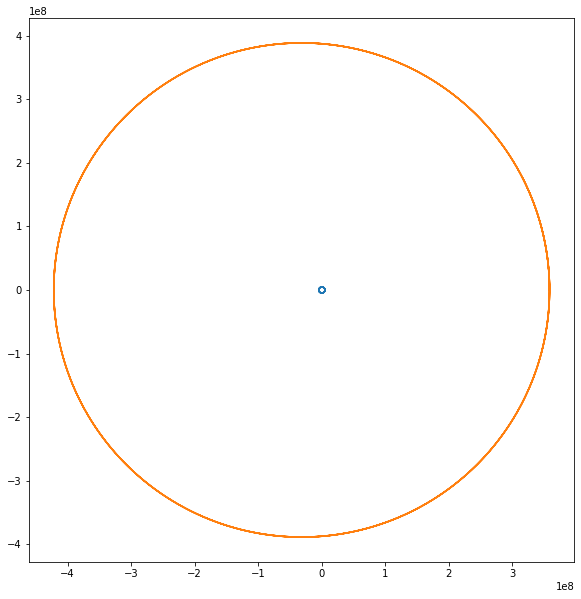

In [15]:
i0 = 0
plt.figure(figsize=(10,10))
for i in range(nparticl):
    plt.plot(x[i0:,i,0], x[i0:,i,1])
    
plt.gca().set_aspect("equal")

Orbita Země

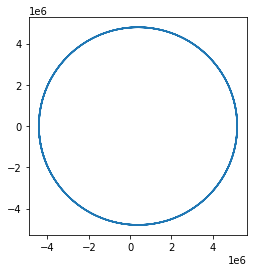

In [16]:
plt.plot(x[0:,0,0], x[0:,0,1])
plt.gca().set_aspect("equal")

### Vývoj různých složek energie

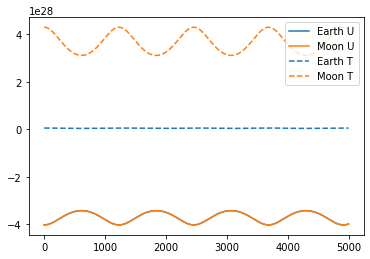

In [10]:
plt.plot(U[:,0], "-C0", label="Earth U")
plt.plot(U[:,1], "-C1", label="Moon U")
plt.plot(T[:,0], "--C0", label="Earth T")
plt.plot(T[:,1], "--C1", label="Moon T")
plt.legend()

Celková energie

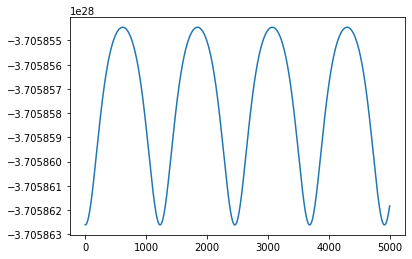

In [17]:
plt.rcParams['axes.formatter.useoffset'] = False
plt.plot(U[:,0]+U[:,1]+T[:,0]+T[:,1])

Energie Měsíce

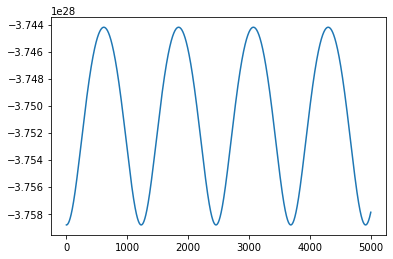

In [86]:
plt.rcParams['axes.formatter.useoffset'] = False
plt.plot(U[:,1]*2+T[:,1])

# Zápočtová úloha
Základ - Přidejte do simulace 3. těleso - sondu a vypočtěte trajektorii

Doplňkové možnosti - zobrazte např. trajektorii v korotující soustavě Země - Měsíc, modelujte gravitační prak, orbitu kolem Lagrangeova bodu, atd..

In [19]:
ndim = 2
nparticl = 3
x0 = np.zeros((nparticl, ndim))
v0 = np.zeros((nparticl, ndim))

Mp = 1e3
Vp = 2.5e3
Xp0 = 1e8

m = np.array([[Me], [Mm], [Mp]])

x0[0,:] = [Xe_perig, 0]
x0[1,:] = [Xm_perig, 0]
x0[2,:] = [Xp0, 0]
v0[0] = [0, Ve_CM_max]
v0[1] = [0, Vm_CM_max]
v0[2] = [1, Vp]

In [25]:
v, x, t = euler_cromer_motion(F_grav, m, x0, v0, 10000000, 2000)

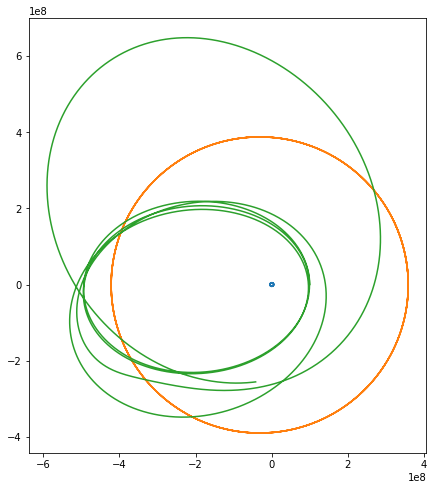

In [26]:
plt.figure(figsize=(8,8))
for i in range(nparticl):
    plt.plot(x[:,i,0], x[:,i,1])
    
plt.gca().set_aspect("equal")

Situace bude přehlednější, když si ji zobrazíme v korotující soustavě

In [27]:
def corotate_coord(x, i_moon):# show motion relative to center-Moon axis
    i_moon = 1
    x_moon = x[:,i_moon,0]
    y_moon = x[:,i_moon,1]
    phi = np.arctan2(y_moon, x_moon)

    rot = np.array([[np.cos(phi), -np.sin(phi)],
                   [np.sin(phi),  np.cos(phi)]])

    rot = np.swapaxes(rot, 2, 0)
    x_rot = np.array([np.matmul(rot, x[:,i,:,None])[:,:] for i in range(nparticl)])
    return x_rot

In [28]:
x_rot = corotate_coord(x, 1)

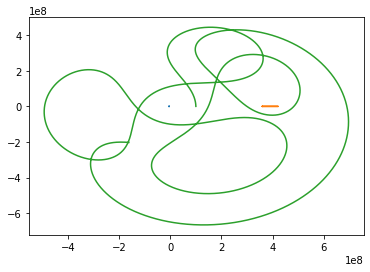

In [29]:
for i in range(nparticl):
    plt.plot(x_rot[i,:,0], x_rot[i,:,1])

### Gravitační prak

In [40]:
ndim = 2
nparticl = 3
x0 = np.zeros((nparticl, ndim))
v0 = np.zeros((nparticl, ndim))

Mp = 1e3
Vp = 2.5e3
Xp0 = 1e8

m = np.array([[Me], [Mm], [Mp]])

x0[0,:] = [Xe_perig, 0]
x0[1,:] = [Xm_perig, 0]
x0[2,:] = [0, -Xp0]
v0[0] = [0, Ve_CM_max]
v0[1] = [0, Vm_CM_max]
v0[2] = [Vp, 0]

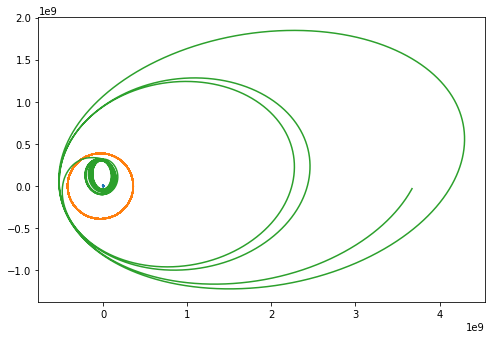

In [73]:
plt.figure(figsize=(8,8))
for i in range(nparticl):
    plt.plot(x[:,i,0], x[:,i,1])
    
plt.gca().set_aspect("equal")
#lim = 9e8
#plt.xlim(-lim, lim)
#plt.ylim(-lim, lim)

### Těžké 3. těleso

In [27]:
ndim = 2
nparticl = 3
x0 = np.zeros((nparticl, ndim))
v0 = np.zeros((nparticl, ndim))
m = np.array([[1], [1], [1]])*2e10

x0[0,:] = 0
x0[1,:] = 1
x0[2,:] = 2
v0[0] = [0, 1]
v0[1] = [0, -1]
v0[2] = [1, -1]
v0[0] = [-.5, 1.5]
v0[1] = [-.5, -0.5]
v0[2] = [.5, -.5]
v, x, t = euler_cromer_motion(f_grav, m, x0, v0, 250, 0.001)

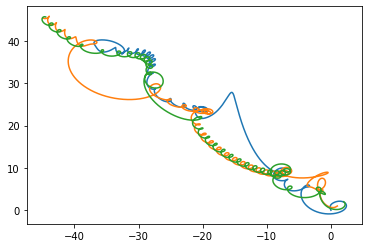

In [28]:
for i in range(nparticl):
    plt.plot(x[:,i,0], x[:,i,1])

### Ověření numerické přesnosti podle časového kroku

In [31]:
ndim = 2
nparticl = 3
x0 = np.zeros((nparticl, ndim))
v0 = np.zeros((nparticl, ndim))
Me = 5.97e24
Mm = 7.35e22
Mp = 1.082e3

X_m_e_perig = 3.633e8 # distance Moon center - Earth center
Vm_CM_max = 1.082e3   # Moon speed relative to center of mass

Xm_perig = X_m_e_perig * Me/(Mm + Me)
Xe_perig = -X_m_e_perig * Mm/(Mm + Me)

Ve_CM_max = -Vm_CM_max * Mm/Me

Xp0 = 1e8


m = np.array([[Me], [Mm], [Mp]])

Vp = 2.5e3
x0[0,:] = [Xe_perig, 0]
x0[1,:] = [Xm_perig, 0]
x0[2,:] = [Xp0, 0]
v0[0] = [0, Ve_CM_max]
v0[1] = [0, Vm_CM_max]
v0[2] = [1, Vp]

v, x, t = euler_cromer_motion(F_grav, m, x0, v0, 10000000, 2000)

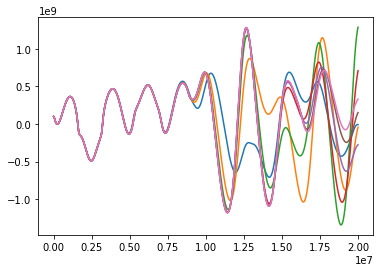

In [37]:
for dt in [2000, 1000, 500, 200, 100, 50, 20]:
    v, x, t = verlet_motion(F_grav, m, x0, v0, 20000000, dt)
    x_rot = corotate_coord(x, 1)
    nstep = x_rot.shape[1]
    plt.plot(np.arange(nstep)*dt, x_rot[2,:,0])#, x_rot[2,:imax,1])
